# Gold Price - ML Prediction

The goal is to predict gold prices using the data provided.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [2]:
df = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [19]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [3]:
df.shape

(2290, 6)

In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

**Correlation: Positive & Negative Correlation**

In [14]:
#select numeric columns for correlation
numeric_df= df.drop(columns=['Date'])

# Compute correlation
correlation = numeric_df.corr()

<Axes: >

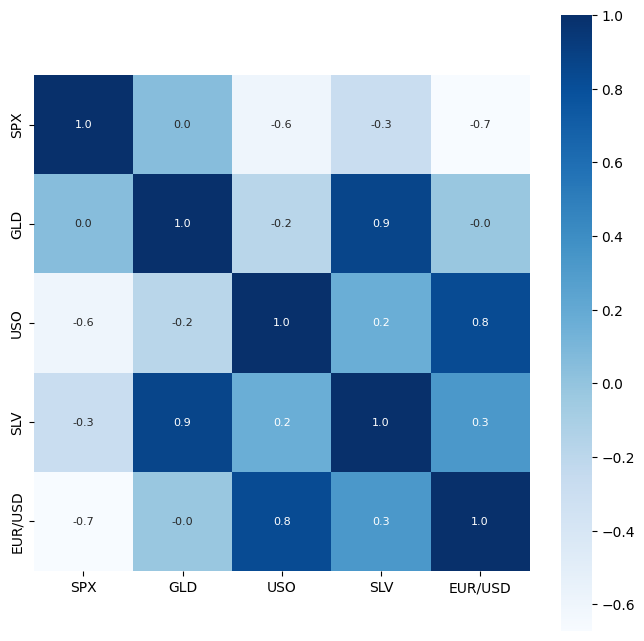

In [16]:
# Make a heatmap to understand the correlation

plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
# Corraletion value of Gold

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipykernel_33/87455053.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_df['GLD'], color='green')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

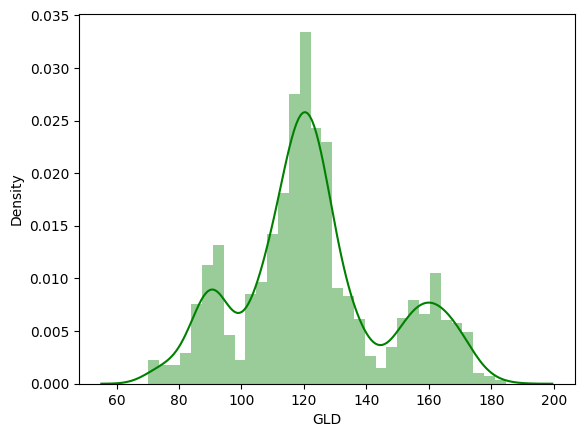

In [18]:
# Checking the distribution of the GLD price
sns.distplot(numeric_df['GLD'], color='green')

**Splitting the features and Target**

In [21]:
X = df.drop(['Date', 'GLD'], axis=1)
Y = df['GLD']

In [24]:
print(X.head())

           SPX        USO     SLV   EUR/USD
0  1447.160034  78.470001  15.180  1.471692
1  1447.160034  78.370003  15.285  1.474491
2  1411.630005  77.309998  15.167  1.475492
3  1416.180054  75.500000  15.053  1.468299
4  1390.189941  76.059998  15.590  1.557099


In [25]:
print(Y.head())

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64


**Splitting Training data & Test data**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

**Model Training:  Random Forest Regressor**

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
# Training the model

regressor.fit(X_train, y_train)

RandomForestRegressor()

**Model Evaluation**

In [30]:
# prediction on Test data

test_data_prediction = regressor.predict(X_test)

print(test_data_prediction)

[164.2921003  127.61589861 124.20609927 119.38409868 125.86409906
  86.38899821 171.79790163 137.71140025 106.6087007  132.72890205
 120.78899938 124.78180078 143.25609885 104.51959947  80.82689892
 119.18480011 140.19599997  90.33710058  91.52449944 128.30550199
 125.55349934 147.5925002  116.63470187 153.2183995  129.49199846
 129.42509993 118.15290118 111.36839989 168.54170226 158.18699796
 126.07000163 153.80270172 127.10339967 122.83659773 116.35610152
 154.73870009 115.08890019 120.49490084 103.98140205 105.41290032
 135.4606989   85.88339991 155.93950105 121.17059984 122.31660074
 155.34120079 120.68000019 116.50340002 169.06650248 116.90080056
 138.48220111 161.74839838 158.63150043 153.11470155 124.21790024
 117.12040009 167.23580082 117.23039962 165.54310026  83.99620004
 121.36119912 122.25050019 120.11360009 172.02749843 118.85999957
 180.96419609 161.89330293 138.90870227 115.4652997   92.5912007
 171.99939973 117.47839995 117.8171986  125.46910066 147.56539965
  91.168100

In [31]:
# R-Squared error
error_score = metrics.r2_score(y_test, test_data_prediction)

print('R-squared error :', error_score)

R-squared error : 0.9859041513661182


**Compare the actual values & predicted values in a plot**

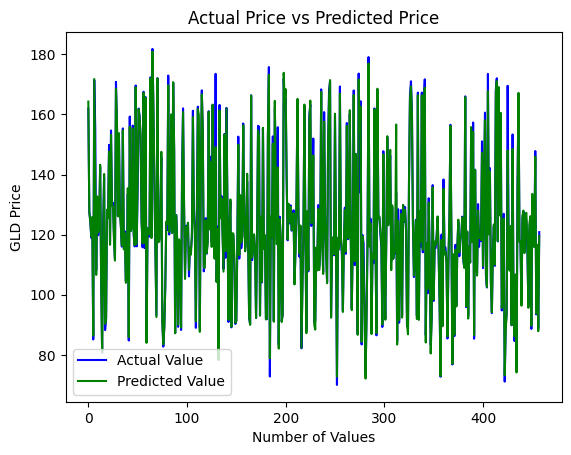

In [33]:
# Convert y_test from a pandas series DataFrame to a list
y_test = list(y_test)


plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()